In [1]:
import os
import numpy as np

from matplotlib import pyplot as plt
#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widget

In [61]:
from cellpose import plot, utils, io
from cellpose import models
from cellpose.io import imread
# locate and access input image files
filename = "WT_data_sample_movie_3-1_single_timepoint.tif"
X_total = io.imread(filename)

print(np.shape(X_total))
print(np.shape(np.transpose(X_total,(0,2,3,1))))

start = 0
numPlanes = 334
X_total = np.transpose(X_total,(0,2,3,1))
numYPlanes = np.shape(X_total)[2]
X_total[:,:,:,[0,1]] = X_total[:,:,:,[1,0]] # swap 1,0 in 4th dimension to get nuclear channel in dimension 0, membrane in 1
X_total = X_total[start:start+numPlanes,:,:,:]
print(np.shape(X_total))

100%|███████████████████████████████████████████████████████████████████████████████| 670/670 [00:00<00:00, 904.18it/s]


(335, 2, 601, 961)
(335, 601, 961, 2)
(334, 601, 961, 2)


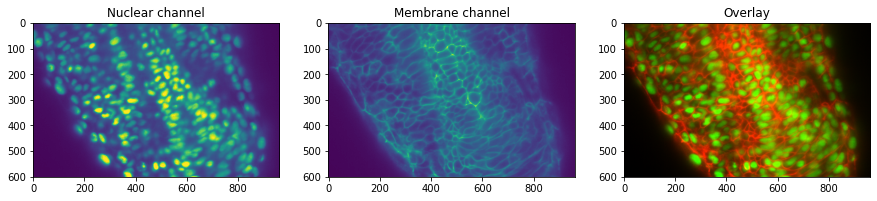

In [18]:
# select index for displaying
idx = 0

# plot the data
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(X_total[idx, ..., 0])
ax[1].imshow(X_total[idx, ..., 1])
ax[2].imshow(plot.image_to_rgb(X_total[idx,:,:,:], channels = [2,1]))

ax[0].set_title('Nuclear channel')
ax[1].set_title('Membrane channel')
ax[2].set_title('Overlay')

plt.show()

In [19]:
# make a prediction using cellpose, then compare overlay with the prediction on top
# maybe use show_segmentation function
#model = models.Cellpose(gpu=True, model_type='cyto')
model = models.Cellpose(gpu=True, model_type='cyto2') #makes more default segmentations, but lines are not as crisp as cyto
#model_new = models.CellposeModel(gpu=True, model_type='tissuenet') #doesn't get the membranes very well even with higher flow.
# tissuenet really feels more like a nuclear segmentator


In [62]:
chan = [2,1]
diam=47 # open image in FIJI, draw line segment on a median sized cell, analyze > measure to get pixel count
img = X_total
masks, flows, styles, _ = model.eval(img, diameter=diam, flow_threshold = 0.6, do_3D=False, \
                                             z_axis = 0, stitch_threshold=0.3, channels=chan)
## This runs the code with the 2D algorithm, stitching slices 
#   as described here https://cellpose.readthedocs.io/en/latest/inputs.html 

np.save('output.npy', masks)

(334, 601, 961, 2)
34 17 2
0 0
1 20
2 40
3 60
4 80
5 100
6 120
7 140
8 160
9 180
10 200
11 220
12 240
13 260
14 280
15 300
16 320
8 4 2
0 0
(334, 601, 961) (334, 601)
1 250
(334, 601, 961) (334, 601)
2 500
(334, 601, 961) (334, 601)
3 750
(334, 601, 961) (334, 601)


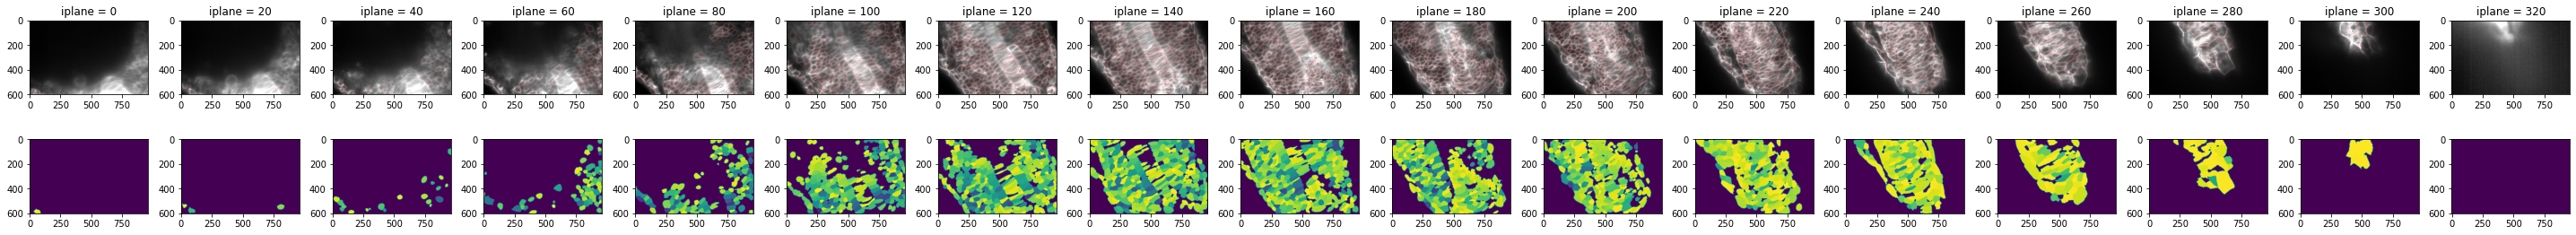

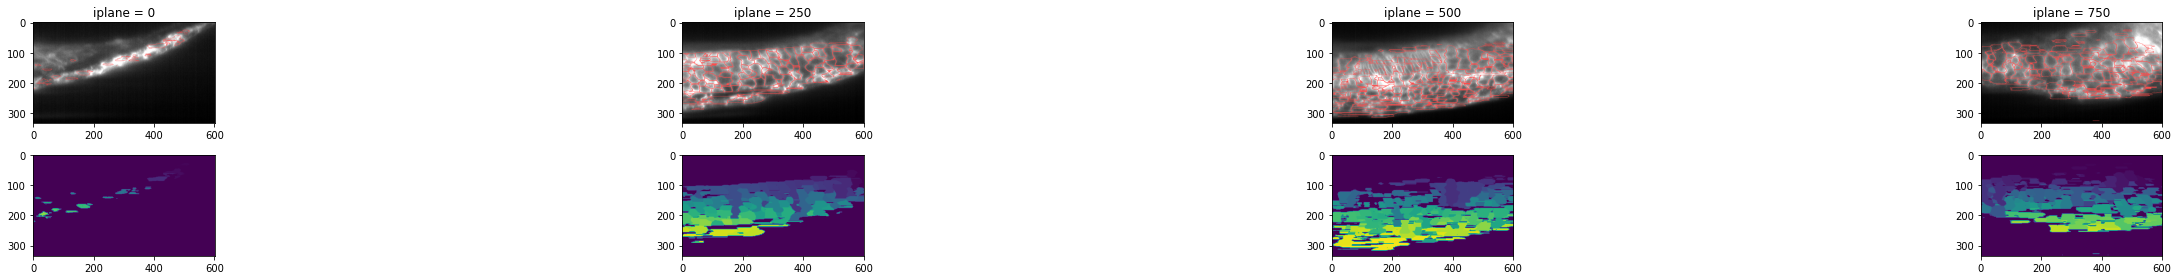

In [74]:
print(np.shape(img))
showPlots = True
if (showPlots):

    # plot in XY 
    zskip = 20
    yskip = 250

    # decide how to arrange subplots
    totalNumberOfPlots = int(2* numPlanes / zskip) + 1 
    numberOfColumns = int(totalNumberOfPlots/2)
    numberOfRows = int(totalNumberOfPlots/numberOfColumns)
    print(totalNumberOfPlots, numberOfColumns, numberOfRows)


    # set image slice to rgb, overlay the mask as an outline onto original image and display in subplot
    plt.figure(figsize=(40,4), tight_layout=True)
    for i,iplane in enumerate(np.arange(0,numPlanes,zskip,int)):
        print(i, iplane)
        img0 = plot.image_to_rgb(img[iplane, :, :, 1].copy(), channels=[2])
        plt.subplot(numberOfRows,numberOfColumns,i+1)
        outlines = utils.masks_to_outlines(masks[iplane])
        outX, outY = np.nonzero(outlines)
        imgout= img0.copy()
        imgout[outX, outY] = np.array([255,75,75])
        plt.imshow(imgout)
        plt.title('iplane = %d'%iplane)
        plt.subplot(numberOfRows,numberOfColumns, (i+numberOfColumns+1)) 
        plt.imshow(masks[iplane])


    # plot in XZ: this is REALLY important to check cells are being assigned correctly 

    # decide how to arrange subplots
    totalNumberOfPlots = int(2* numYPlanes / yskip) + 1
    numberOfColumns = int(totalNumberOfPlots/2)
    numberOfRows = int(totalNumberOfPlots/numberOfColumns)
    print(totalNumberOfPlots, numberOfColumns, numberOfRows)

    # set image slice to rgb, overlay the mask as an outline onto original image and display in subplot
    plt.figure(figsize=(40,4), tight_layout=True)
    for i,iplane in enumerate(np.arange(0,numYPlanes,yskip,int)):
        print(i, iplane)
        img0 = plot.image_to_rgb(img[:, :, iplane, 1].copy(), channels=[2])
        plt.subplot(numberOfRows,numberOfColumns,i+1)
        outlines = utils.masks_to_outlines(masks[:, :, iplane])
        print(np.shape(masks), np.shape(masks[:, :, iplane]))
        outX, outY = np.nonzero(outlines)
        imgout= img0.copy()
        imgout[outX, outY] = np.array([255,75,75])
        plt.imshow(imgout)
        plt.title('iplane = %d'%iplane)
        plt.subplot(numberOfRows,numberOfColumns, (i+numberOfColumns+1)) 
        plt.imshow(masks[:, :, iplane])


In [ ]:
import napari
img_4D = skimage.io.imread()
masks = np.load('/path/to/cellpose/output/') # you may need imread if these are tiffs 

viewer = napari.Viewer() 
viewer.add_image(img) 
viewer.add_labels(masks) 